In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [104]:
data = pd.read_csv('/home/adamyunian/Desktop/python_code/algoritma_heart_disease_uci/heart.csv')

In [105]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,287,0,3.5,0,0,2,1
2,41,1,2,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [106]:
data.target.value_counts()

1    12
0    12
Name: target, dtype: int64

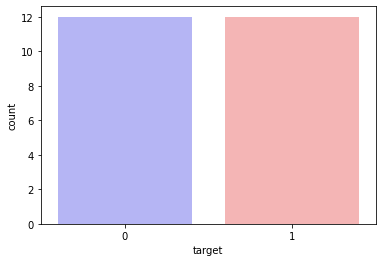

In [107]:
sns.countplot(x='target', data=data, palette='bwr')
plt.show()

In [108]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Have't Heart Disease: {:.2f}%".format((countNoDisease/(len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease/(len(data.target))*100)))

Percentage of Patients Have't Heart Disease: 50.00%
Percentage of Patients Have Heart Disease: 50.00%


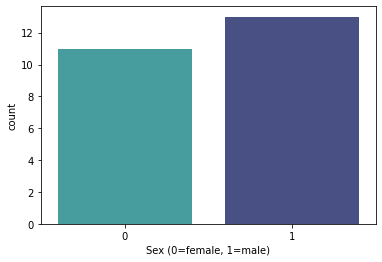

In [109]:
sns.countplot(x='sex', data=data, palette='mako_r')
plt.xlabel("Sex (0=female, 1=male)")
plt.show()

In [110]:
countFemale = len(data[data.sex==0])
countMale = len(data[data.sex==1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale/(len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale/(len(data.sex))*100)))

Percentage of Female Patients: 45.83%
Percentage of Male Patients: 54.17%


In [111]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,58.166667,0.500000,4.000000,132.250000,241.750000,0.416667,0.416667,168.666667,0.333333,3.633333,1.000000,0.0,1.500000
1,46.750000,0.583333,3.166667,130.333333,264.666667,0.416667,0.416667,217.416667,0.500000,3.733333,0.833333,0.0,1.833333


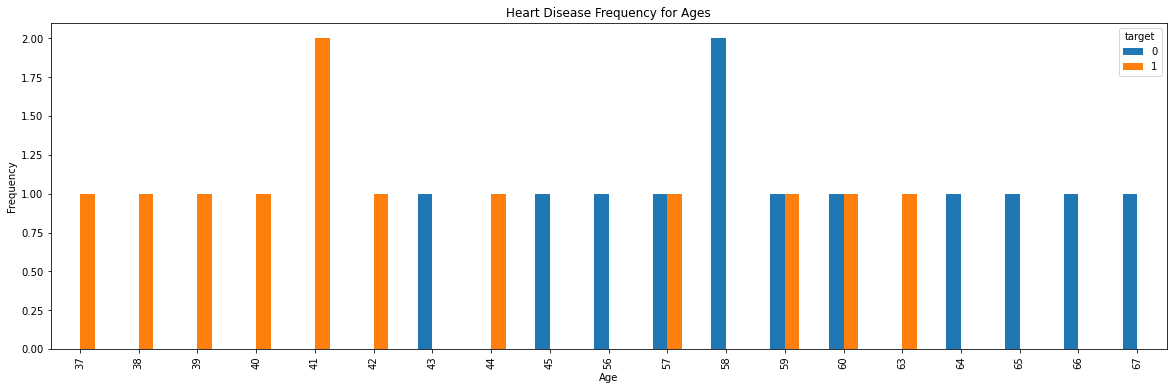

In [112]:
pd.crosstab(data.age, data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

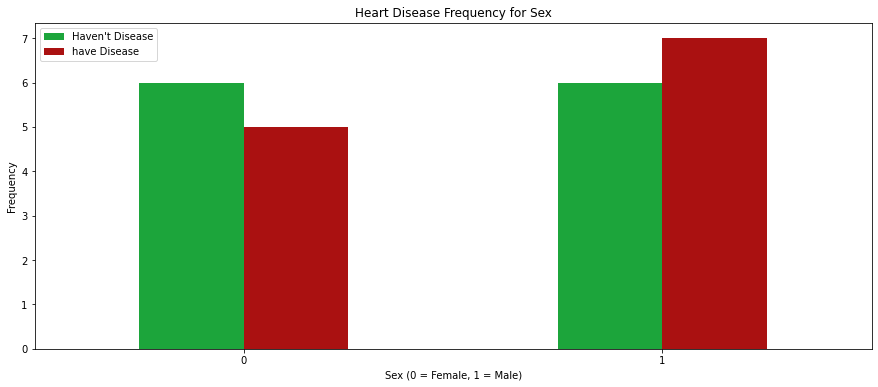

In [113]:
pd.crosstab(data.sex, data.target).plot(kind='bar', figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", 'have Disease'])
plt.ylabel('Frequency')
plt.show()

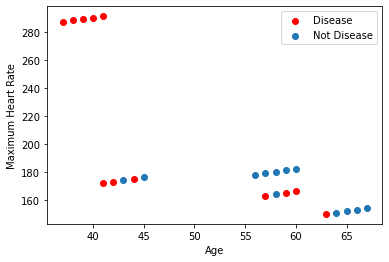

In [114]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c='red')
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(['Disease', 'Not Disease'])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

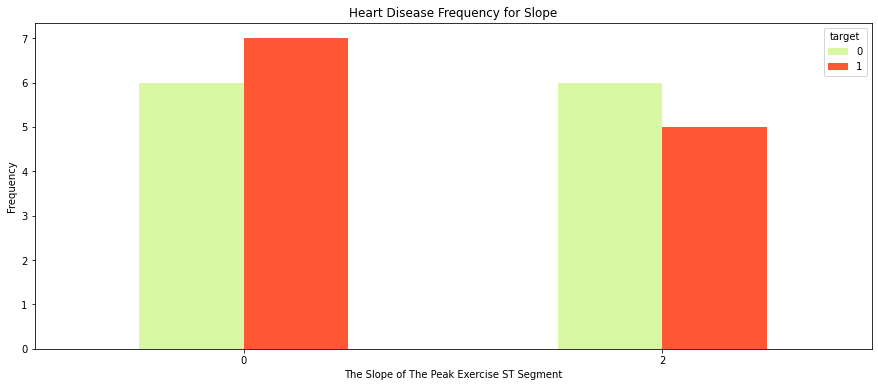

In [115]:
pd.crosstab(data.slope, data.target).plot(kind='bar',figsize=(15,6),color=['#DAF7A6','#FF5733'])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

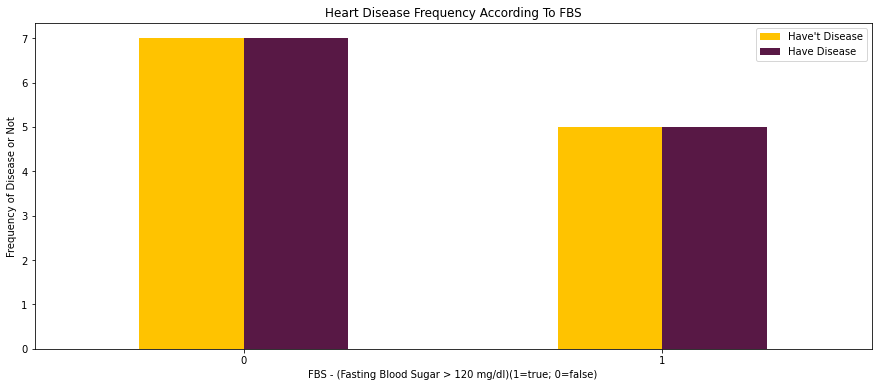

In [116]:
pd.crosstab(data.fbs, data.target).plot(kind='bar', figsize=(15,6), color=['#FFC300','#581845'])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl)(1=true; 0=false)')
plt.xticks(rotation=0)
plt.legend(["Have't Disease", 'Have Disease'])
plt.ylabel('Frequency of Disease or Not')
plt.show()

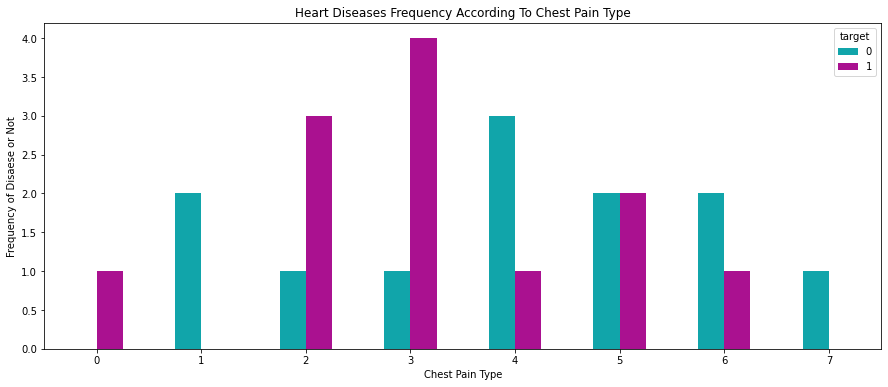

In [117]:
pd.crosstab(data.cp, data.target).plot(kind='bar',figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Heart Diseases Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)
plt.ylabel('Frequency of Disaese or Not')
plt.show()

In [118]:
a = pd.get_dummies(data['cp'], prefix = 'cp')
b = pd.get_dummies(data['thal'], prefix = 'thal')
c = pd.get_dummies(data['slope'], prefix = 'slope')

In [119]:
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_2,cp_3,cp_4,cp_5,cp_6,cp_7,thal_1,thal_2,slope_0,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,1,0
1,37,1,2,130,250,0,1,287,0,3.5,...,1,0,0,0,0,0,0,1,1,0
2,41,1,2,130,204,0,0,172,0,1.4,...,1,0,0,0,0,0,0,1,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,0,0,0,0,0,1,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,0,0,1,0,1


In [120]:
data = data.drop(columns = ['cp', 'thal', 'slope'])
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_2,cp_3,cp_4,cp_5,cp_6,cp_7,thal_1,thal_2,slope_0,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,1,0,0,0,0,1,0,1,0
1,37,1,130,250,0,1,287,0,3.5,0,...,1,0,0,0,0,0,0,1,1,0
2,41,1,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,0,0,1,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,0,0,0,0,0,0,0,1,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,0,0,1,0,1


In [127]:
y = data.target.values
x_data = data.drop(['target'], axis = 1)

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k

In [130]:
# knn.fit(x_train.T, y_train.T)

prediction = knn.predict(x_test.T)
print("{} KNN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [131]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

maxaccuracy = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(maxaccuracy))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').